In [2]:
import pandas as pd

In [3]:
with open("C:/Users/Ольга/patient_model.txt", encoding='utf-8') as f:
    patients_m = f.read()
    patients_m = patients_m.split(sep=',')

In [4]:
with open("C:/Users/Ольга/control_model.txt", encoding='utf-8') as f:
    control_m = f.read()
    control_m = control_m.split(sep=',')

In [10]:
with open("C:/Users/Ольга/Desktop/радость.txt", encoding='utf-8') as f:
    good = f.read()
    good = good.split(sep=',')

In [11]:
with open("C:/Users/Ольга/Desktop/печаль.txt", encoding='utf-8') as f:
    bad = f.read()
    bad = bad.split(sep=',')

In [8]:
def calculate_1(file):
    percent_good = []
    percent_bad = []
    for elem in file:
        if elem in good:
            percent_good.append(elem)
        elif elem in bad:
            percent_bad.append(elem)

    per_cent_good = len(percent_good) / len(file) * 100
    per_cent_bad = len(percent_bad) / len(file) * 100
    return round(per_cent_good, 2), round(per_cent_bad, 2)

In [12]:
pos_patients = []
neg_patients = []
for elem in patients_m:
    a, b = calculate_1(elem.split(sep=' '))
    pos_patients.append(a)
    neg_patients.append(b)

In [13]:
pos_conrol = []
neg_conrol = []
for elem in control_m:
    a, b = calculate_1(elem.split(sep=' '))
    pos_conrol.append(a)
    neg_conrol.append(b)

# DATA

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [15]:
data = pd.read_csv("C:/Users/Ольга/Desktop/contol_group  - errors.csv")

data['positive voc'] = pos_patients + pos_conrol
data['negative voc'] = neg_patients + neg_conrol

data = data.drop(['ID', 'group', 'diagnosis'], axis=1)

data = pd.get_dummies(data, drop_first=True)
data.head()

data.head()

,group1,age,years of education,errors,...=,...*,positive voc,negative voc,sex_male,education_higher.unfinished,education_secondary,education_vocational,education_vocational.unfinished,education_ученая степень
0,0,36,17,0,0,0,3.03,0.0,0,0,0,0,0,0
1,0,27,18,0,0,0,0.00,0.0,0,0,0,0,0,0
2,0,20,14,0,0,0,0.00,0.0,1,0,0,0,0,0
3,0,21,14,1,0,1,9.09,0.0,0,0,0,0,0,0
4,0,25,18,0,0,0,0.00,0.0,1,0,0,0,0,0


In [16]:
data.corr()

,group1,age,years of education,errors,...=,...*,positive voc,negative voc,sex_male,education_higher.unfinished,education_secondary,education_vocational,education_vocational.unfinished,education_ученая степень
group1,1.000000,-0.217570,-0.490711,0.380058,0.412925,0.134702,-0.057569,-0.082948,-0.105294,-0.073511,0.310517,0.073771,0.387298,-0.120386
age,-0.217570,1.000000,0.401527,-0.010060,0.031253,-0.079723,-0.005431,-0.138017,0.096716,-0.262900,-0.175465,0.035411,-0.206103,0.097678
years of education,-0.490711,0.401527,1.000000,-0.070644,-0.044896,-0.082554,0.075796,-0.080558,-0.005892,-0.159539,-0.617406,-0.145793,-0.263816,0.306703
errors,0.380058,-0.010060,-0.070644,1.000000,0.911591,0.670172,0.082198,-0.002785,0.044347,-0.030803,0.012980,0.001942,0.167003,0.032233
...=,0.412925,0.031253,-0.044896,0.911591,1.000000,0.305803,0.055877,-0.006944,-0.012300,-0.059980,-0.001514,0.007473,0.134517,0.021371
...*,0.134702,-0.079723,-0.082554,0.670172,0.305803,1.000000,0.089487,0.006086,0.124913,0.036950,0.032794,-0.008995,0.143917,0.036067
positive voc,-0.057569,-0.005431,0.075796,0.082198,0.055877,0.089487,1.000000,-0.030746,-0.040067,0.033504,-0.088469,0.076512,-0.027768,0.032694
negative voc,-0.082948,-0.138017,-0.080558,-0.002785,-0.006944,0.006086,-0.030746,1.000000,-0.142237,-0.037327,-0.112333,-0.066566,0.104408,-0.068011
sex_male,-0.105294,0.096716,-0.005892,0.044347,-0.012300,0.124913,-0.040067,-0.142237,1.000000,0.182002,0.156269,-0.115728,-0.115728,0.158277
education_higher.unfinished,-0.073511,-0.262900,-0.159539,-0.030803,-0.059980,0.036950,0.033504,-0.037327,0.182002,1.000000,-0.200805,-0.132186,-0.132186,-0.098611


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
normalizer = StandardScaler()
normalizer.fit(data[['age', 'years of education', 'errors', '...=', 'positive voc', 'negative voc']])
X_transformed = normalizer.transform(data[['age', 'years of education', 'errors', '...=', 'positive voc', 'negative voc']])

In [19]:
data[['age', 'years of education', 'errors', '...=', 'positive voc', 'negative voc']] = X_transformed
data

,group1,age,years of education,errors,...=,...*,positive voc,negative voc,sex_male,education_higher.unfinished,education_secondary,education_vocational,education_vocational.unfinished,education_ученая степень
0,0,0.876996,1.128159,-0.520429,-0.478281,0,1.143875,-0.364668,0,0,0,0,0,0
1,0,-0.031382,1.541239,-0.520429,-0.478281,0,-0.758731,-0.364668,0,0,0,0,0,0
2,0,-0.737898,-0.111080,-0.520429,-0.478281,0,-0.758731,-0.364668,1,0,0,0,0,0
3,0,-0.636967,-0.111080,0.403915,-0.478281,1,4.949088,-0.364668,0,0,0,0,0,0
4,0,-0.233244,1.541239,-0.520429,-0.478281,0,-0.758731,-0.364668,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,1,-0.737898,-0.524160,-0.520429,-0.478281,0,-0.758731,-0.364668,0,0,0,0,1,0
115,1,0.473273,0.302000,0.403915,0.707458,0,-0.231276,-0.364668,0,0,0,0,0,0
116,1,0.776066,0.715080,2.252601,1.893197,1,-0.331744,-0.364668,0,0,0,0,0,0
117,1,-0.838829,-0.937240,0.403915,0.707458,0,0.497114,-0.364668,0,0,0,0,1,0


# TRAIN/TEST

In [59]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report
from sklearn. model_selection import cross_val_score
from numpy import mean

In [60]:
X = data.drop('group1', axis=1) 
y = data['group1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

# LOG REGRESSION

In [146]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
report = classification_report(y_test, y_pred, target_names=['0', '1'])
print(report)
joblib.dump(log_reg, 'log_reg.pkl')

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        34
           1       0.82      0.64      0.72        14

    accuracy                           0.85        48
   macro avg       0.84      0.79      0.81        48
weighted avg       0.85      0.85      0.85        48



['log_reg.pkl']

# RandomForestClassifier

In [68]:
import joblib

In [46]:
rf = RandomForestClassifier()
hyperparams = {
    'n_estimators': [5, 25, 100, 200],
    'max_depth': [12, 24, 48, None]
}

cross_val = GridSearchCV(rf, hyperparams, cv=5)
cross_val.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [12, 24, 48, None],
                         'n_estimators': [5, 25, 100, 200]})

In [47]:
def results(results):
    print(f'Optimal Hyperparams: {results.best_params_}')
    mean = results.cv_results_['mean_test_score']

    for mean, params in zip(mean, results.cv_results_['params']):
        print(f'Recall {round(mean, 3)}, Hyperparameters {params}')

In [48]:
results(cross_val)

Optimal Hyperparams: {'max_depth': 12, 'n_estimators': 200}
Recall 0.831, Hyperparameters {'max_depth': 12, 'n_estimators': 5}
Recall 0.819, Hyperparameters {'max_depth': 12, 'n_estimators': 25}
Recall 0.805, Hyperparameters {'max_depth': 12, 'n_estimators': 100}
Recall 0.833, Hyperparameters {'max_depth': 12, 'n_estimators': 200}
Recall 0.735, Hyperparameters {'max_depth': 24, 'n_estimators': 5}
Recall 0.832, Hyperparameters {'max_depth': 24, 'n_estimators': 25}
Recall 0.819, Hyperparameters {'max_depth': 24, 'n_estimators': 100}
Recall 0.79, Hyperparameters {'max_depth': 24, 'n_estimators': 200}
Recall 0.762, Hyperparameters {'max_depth': 48, 'n_estimators': 5}
Recall 0.805, Hyperparameters {'max_depth': 48, 'n_estimators': 25}
Recall 0.805, Hyperparameters {'max_depth': 48, 'n_estimators': 100}
Recall 0.833, Hyperparameters {'max_depth': 48, 'n_estimators': 200}
Recall 0.762, Hyperparameters {'max_depth': None, 'n_estimators': 5}
Recall 0.82, Hyperparameters {'max_depth': None, 'n_e

In [151]:
rf1 = RandomForestClassifier(n_estimators=200, max_depth=12)
rf2 = RandomForestClassifier(n_estimators=200, max_depth=48)
rf3 = RandomForestClassifier(n_estimators=25, max_depth=24)

clf = [rf1, rf2, rf3]
lab = ['rf1.pkl', 'rf2.pkl', 'rf3.pkl']

for clf, lab in zip(clf, lab):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=['0', '1'])
    print(clf, '\n', report)
    joblib.dump(clf, lab)
    

RandomForestClassifier(max_depth=12, n_estimators=200) 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90        34
           1       0.77      0.71      0.74        14

    accuracy                           0.85        48
   macro avg       0.83      0.81      0.82        48
weighted avg       0.85      0.85      0.85        48

RandomForestClassifier(max_depth=48, n_estimators=200) 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90        34
           1       0.77      0.71      0.74        14

    accuracy                           0.85        48
   macro avg       0.83      0.81      0.82        48
weighted avg       0.85      0.85      0.85        48

RandomForestClassifier(max_depth=24, n_estimators=25) 
               precision    recall  f1-score   support

           0       0.91      0.88      0.90        34
           1       0.73      0.79      0.76        14

    accuracy

In [152]:
model_final = joblib.load('rf3.pkl')

# LinearDiscriminantAnalysis

In [153]:
from sklearn. discriminant_analysis import LinearDiscriminantAnalysis 
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
y_pre = model.predict(X_test)
report = classification_report(y_test, y_pre, target_names=['0', '1'])
print(report)
joblib.dump(model, 'LinearDiscriminantAnalysis.pkl')

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        34
           1       0.77      0.71      0.74        14

    accuracy                           0.85        48
   macro avg       0.83      0.81      0.82        48
weighted avg       0.85      0.85      0.85        48



['LinearDiscriminantAnalysis.pkl']

# SVM

In [154]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred, target_names=['0', '1'])
print(report)
joblib.dump(clf, 'SVM.pkl')

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        34
           1       0.77      0.71      0.74        14

    accuracy                           0.85        48
   macro avg       0.83      0.81      0.82        48
weighted avg       0.85      0.85      0.85        48



['SVM.pkl']

# Models

In [155]:
models = []
names = ['log_reg.pkl', 'rf1.pkl', 'rf2.pkl', 'rf3.pkl', 'LinearDiscriminantAnalysis.pkl', 'SVM.pkl']
for name in names:
    models.append(joblib.load(name))

In [156]:
models

[LogisticRegression(max_iter=10000),
 RandomForestClassifier(max_depth=12, n_estimators=200),
 RandomForestClassifier(max_depth=48, n_estimators=200),
 RandomForestClassifier(max_depth=24, n_estimators=25),
 LinearDiscriminantAnalysis(),
 SVC()]

# визуализация

In [167]:
y_pred = model_final.predict(X_test)

In [168]:
recall = recall_score(y_test, y_pred)
print(recall)

0.7857142857142857


In [169]:
model = []
for i, j in zip(list(y_test), list(y_pred)):
    if i == j:
        model.append("верное предсказание")
    else:
        model.append("ошибка")

In [170]:
shiz = []
for i in list(y_test):
    if i == 1:
        shiz.append('есть шизофрения')
    else:
        shiz.append('нет шизофрения')

In [171]:
df = pd.DataFrame()
df['предсказание модели'] = model
df['шизофрения'] = shiz
df.head()

,предсказание модели,шизофрения
0,верное предсказание,нет шизофрения
1,верное предсказание,есть шизофрения
2,верное предсказание,нет шизофрения
3,верное предсказание,есть шизофрения
4,ошибка,есть шизофрения


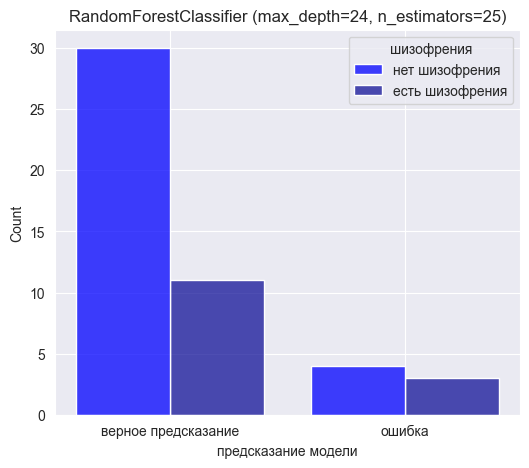

In [172]:
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

plt.figure(figsize=(6,5))
sns.set_palette(sns.dark_palette(color='blue', n_colors=3, reverse=True))
fig = sns.histplot(data=df, x="предсказание модели", hue="шизофрения", multiple="dodge", shrink=.8)
plt.title('RandomForestClassifier (max_depth=24, n_estimators=25)')
plt.show()

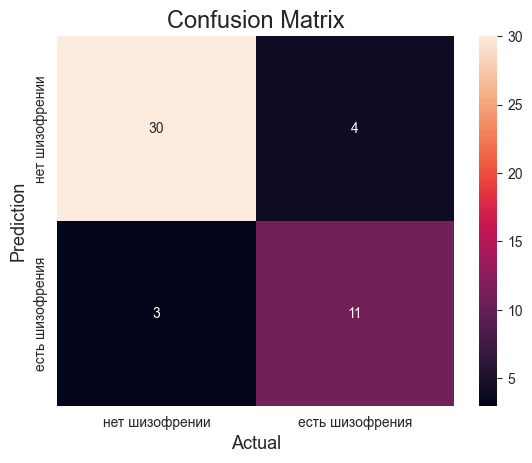

In [174]:
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_matrix,
            annot=True,
            fmt='g',
            xticklabels=['нет шизофрении','есть шизофрения'],
            yticklabels=['нет шизофрении','есть шизофрения'])

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()